<a href="https://colab.research.google.com/github/daniyar-udel/PUS2024_DAbykhanov/blob/main/HW5/PUS_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## The paper aims to assess the effectiveness of using city-specific public open data for energy benchmarking in buildings, comparing it to the established Commercial Building Energy Consumption Survey (CBECS) dataset. The analysis employs two benchmarking models across ten major cities, utilizing both linear and non-linear approaches—specifically random forest and lasso regression. The authors seek to demonstrate that models based on open data can outperform those using the CBECS dataset. Preliminary findings suggest that key factors such as building area, property type, conditioned area, and water usage are critical for effective benchmarking. The ultimate goals are to advocate for a data-driven benchmarking framework that leverages open data and to propose policy changes that promote transparency and incentivize energy efficiency in urban buildings. In my analysis I will take an open data, then I will provide exploratory data analysis and feature engineering. After that I will train random forest regression algorithm and evaluate the results.

# Task 2

## I'am going to work with the next data:

1.   Washington D.C.(2016 Building Benchmarking Datase)
2.   London(Display Energy Certificate Register dataset for all UK public buildings)



# Task 3.1

# choose a city and read in the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
wdc = pd.read_csv("/content/2016 Energy and Water Performance Benchmarking Results as of 09-07-2017.csv")

In [3]:
wdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pid                            2181 non-null   object 
 1   dc_real_pid                    2181 non-null   object 
 2   pm_pid                         1574 non-null   float64
 3   property_name                  1521 non-null   object 
 4   pm_parent_pid                  1521 non-null   object 
 5   parent_property_name           1521 non-null   object 
 6   year_ending                    2181 non-null   object 
 7   report_status                  2181 non-null   object 
 8   address_of_record              2181 non-null   object 
 9   owner_of_record                2181 non-null   object 
 10  ward                           1844 non-null   float64
 11  reported_address               1521 non-null   object 
 12  city                           2181 non-null   o

## inspect the dataframe

In [4]:
wdc.head()

,pid,dc_real_pid,pm_pid,property_name,pm_parent_pid,parent_property_name,year_ending,report_status,address_of_record,owner_of_record,...,total_ghg_emissions_intensity,water_use,electricity_use,natural_gas_use,fuel_use,district_water_use,metered_areas_energy,metered_areas_water,latitude,longitude
0,PM04352082,27260812;27260821,4352082.0,1440 Rockview Apartments,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,In Compliance,1440 ROCK CREEK FORD RD NW; 6040 14TH ST NW,AUBINOE ROCKVIEW LIMITED PARTNERSHP; VICTORY I...,...,7.4,6963.5,633043.8,44274.18307,NaN,NaN,Whole Building,Whole Building,38.963597,-77.033848
1,PM00002267,0253_0847,2267.0,600 Thirteenth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,In Compliance,0600 13TH ST NW,UNION INVESTMENT REAL ESTATE GMBH,...,8.4,8490.0,5531486.0,NaN,NaN,NaN,Whole Building,Whole Building,38.897849,-77.029872
2,PM00005829,0183_0857,5829.0,1101 17th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,In Compliance,1101 17TH ST NW,CESC 1101 17TH STREET LIMITED PARTNERSHIP,...,8.3,8749.1,3863003.0,64143.38666,NaN,NaN,Whole Building,Whole Building,38.904056,-77.037973
3,PM00006768,0126_0057,6768.0,1776 K Street NW,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,In Compliance,1776 K ST NW,1776 K STREET ASSOCIATES & RIDDELL PARTNERS,...,5.9,5393.8,2936445.0,NaN,NaN,NaN,Whole Building,Whole Building,38.902189,-77.041238
4,PM00013149,0072_0076,13149.0,2101 L St NW,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2016,In Compliance,2101 L ST NW,CESC 2101 L STREET LLC,...,7.5,10422.6,7345290.0,NaN,NaN,NaN,Whole Building,Whole Building,38.904376,-77.046882


In [5]:
print("there are (rows, columns) = ", (wdc.shape), "in the dataframe")

there are (rows, columns) =  (2181, 36) in the dataframe


In [6]:
wdc.describe()

,pm_pid,ward,year_built,tax_record_floor_area,reported_gross_floor_area,energy_star_score,total_ghg_emissions,total_ghg_emissions_intensity,water_use,electricity_use,natural_gas_use,fuel_use,district_water_use,latitude,longitude
count,1.574000e+03,1844.000000,2153.000000,2.181000e+03,1.521000e+03,1209.000000,1519.000000,1519.000000,1.311000e+03,1.482000e+03,1.087000e+03,6.600000e+01,1.700000e+01,1954.000000,1954.000000
mean,3.477316e+06,3.387202,1933.421273,2.009089e+05,1.876181e+05,61.207610,1397.998947,7.221922,5.582172e+04,3.041003e+06,6.745484e+04,1.133411e+06,-1.261140e+07,38.908558,-77.025736
std,1.151670e+06,1.996951,223.684123,2.447139e+05,2.431177e+05,27.486072,2790.536339,6.886701,6.498499e+05,6.584801e+06,2.975285e+05,2.171472e+06,9.224563e+07,0.025003,0.031201
min,2.214000e+03,1.000000,0.000000,9.171000e+03,5.982000e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.097600e+03,-3.685268e+08,38.813539,-77.107478
25%,3.300369e+06,2.000000,1942.000000,7.044300e+04,6.960000e+04,42.000000,390.300000,4.800000,2.114100e+03,7.495754e+05,1.115681e+04,2.461230e+04,7.908049e+05,38.898739,-77.044005
50%,3.617946e+06,2.000000,1969.000000,1.213110e+05,1.194700e+05,69.000000,755.400000,6.300000,4.160100e+03,1.656484e+06,2.791756e+04,1.952242e+05,5.512830e+06,38.905369,-77.031106
75%,4.066820e+06,5.000000,1997.000000,2.488440e+05,2.332170e+05,84.000000,1565.150000,7.900000,7.286700e+03,3.491451e+06,5.286096e+04,1.371327e+06,1.457592e+07,38.922848,-77.009371
max,5.939893e+06,8.000000,2017.000000,3.997572e+06,5.634890e+06,100.000000,64992.500000,134.400000,1.929391e+07,1.661020e+08,7.269109e+06,1.275372e+07,3.101497e+07,38.984554,-76.914972


## Clean the data

In [7]:
for w in wdc.columns:

  # count number of rows with missing values
  n_miss = wdc[w].isnull().sum()
  perc = n_miss / wdc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (w, wdc[w].dtype,
                                                  n_miss, perc))


pid (object):  Missing: 0 (0.0%)
dc_real_pid (object):  Missing: 0 (0.0%)
pm_pid (float64):  Missing: 607 (27.8%)
property_name (object):  Missing: 660 (30.3%)
pm_parent_pid (object):  Missing: 660 (30.3%)
parent_property_name (object):  Missing: 660 (30.3%)
year_ending (object):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
address_of_record (object):  Missing: 0 (0.0%)
owner_of_record (object):  Missing: 0 (0.0%)
ward (float64):  Missing: 337 (15.5%)
reported_address (object):  Missing: 660 (30.3%)
city (object):  Missing: 0 (0.0%)
state (object):  Missing: 0 (0.0%)
postal_code (object):  Missing: 607 (27.8%)
year_built (float64):  Missing: 28 (1.3%)
primary_ptype_self (object):  Missing: 660 (30.3%)
primary_ptype_epa (object):  Missing: 660 (30.3%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 660 (30.3%)
energy_star_score (float64):  Missing: 972 (44.6%)
site_eui (object):  Missing: 674 (30.9%)
weather_norm_site_e

In [8]:
for w in wdc.columns:

  # count number of rows with missing values
  n_miss = wdc[w].isnull().sum()
  perc = n_miss / wdc.shape[0] * 100
  if perc > 40:
    wdc.drop(w, axis=1, inplace=True)


print("there are (rows, columns) = ", (wdc.shape), "in the dataframe")

there are (rows, columns) =  (2181, 31) in the dataframe


In [9]:
for w in wdc.columns:

  # count number of rows with missing values
  n_miss = wdc[w].isnull().sum()
  perc = n_miss / wdc.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (w, wdc[w].dtype,
                                                  n_miss, perc))

pid (object):  Missing: 0 (0.0%)
dc_real_pid (object):  Missing: 0 (0.0%)
pm_pid (float64):  Missing: 607 (27.8%)
property_name (object):  Missing: 660 (30.3%)
pm_parent_pid (object):  Missing: 660 (30.3%)
parent_property_name (object):  Missing: 660 (30.3%)
year_ending (object):  Missing: 0 (0.0%)
report_status (object):  Missing: 0 (0.0%)
address_of_record (object):  Missing: 0 (0.0%)
owner_of_record (object):  Missing: 0 (0.0%)
ward (float64):  Missing: 337 (15.5%)
reported_address (object):  Missing: 660 (30.3%)
city (object):  Missing: 0 (0.0%)
state (object):  Missing: 0 (0.0%)
postal_code (object):  Missing: 607 (27.8%)
year_built (float64):  Missing: 28 (1.3%)
primary_ptype_self (object):  Missing: 660 (30.3%)
primary_ptype_epa (object):  Missing: 660 (30.3%)
tax_record_floor_area (float64):  Missing: 0 (0.0%)
reported_gross_floor_area (float64):  Missing: 660 (30.3%)
site_eui (object):  Missing: 674 (30.9%)
weather_norm_site_eui (object):  Missing: 736 (33.7%)
source_eui (obje

## transform input feature as needed

In [10]:
wdc.describe()

,pm_pid,ward,year_built,tax_record_floor_area,reported_gross_floor_area,total_ghg_emissions,total_ghg_emissions_intensity,water_use,electricity_use,latitude,longitude
count,1.574000e+03,1844.000000,2153.000000,2.181000e+03,1.521000e+03,1519.000000,1519.000000,1.311000e+03,1.482000e+03,1954.000000,1954.000000
mean,3.477316e+06,3.387202,1933.421273,2.009089e+05,1.876181e+05,1397.998947,7.221922,5.582172e+04,3.041003e+06,38.908558,-77.025736
std,1.151670e+06,1.996951,223.684123,2.447139e+05,2.431177e+05,2790.536339,6.886701,6.498499e+05,6.584801e+06,0.025003,0.031201
min,2.214000e+03,1.000000,0.000000,9.171000e+03,5.982000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,38.813539,-77.107478
25%,3.300369e+06,2.000000,1942.000000,7.044300e+04,6.960000e+04,390.300000,4.800000,2.114100e+03,7.495754e+05,38.898739,-77.044005
50%,3.617946e+06,2.000000,1969.000000,1.213110e+05,1.194700e+05,755.400000,6.300000,4.160100e+03,1.656484e+06,38.905369,-77.031106
75%,4.066820e+06,5.000000,1997.000000,2.488440e+05,2.332170e+05,1565.150000,7.900000,7.286700e+03,3.491451e+06,38.922848,-77.009371
max,5.939893e+06,8.000000,2017.000000,3.997572e+06,5.634890e+06,64992.500000,134.400000,1.929391e+07,1.661020e+08,38.984554,-76.914972


In [11]:
wdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   pid                            2181 non-null   object 
 1   dc_real_pid                    2181 non-null   object 
 2   pm_pid                         1574 non-null   float64
 3   property_name                  1521 non-null   object 
 4   pm_parent_pid                  1521 non-null   object 
 5   parent_property_name           1521 non-null   object 
 6   year_ending                    2181 non-null   object 
 7   report_status                  2181 non-null   object 
 8   address_of_record              2181 non-null   object 
 9   owner_of_record                2181 non-null   object 
 10  ward                           1844 non-null   float64
 11  reported_address               1521 non-null   object 
 12  city                           2181 non-null   o

In [12]:
wdc = wdc.drop(['pid', 'dc_real_pid', 'pm_pid', 'property_name', 'pm_parent_pid',
                'parent_property_name', 'year_ending', 'address_of_record',
                'owner_of_record', 'reported_address', 'city', 'state', 'primary_ptype_self', 'primary_ptype_epa'], axis = 1) # I deleted this columns because they consist unique information, same number of categories and too much nubmer of categories

In [13]:
from sklearn.impute import SimpleImputer

wdc['site_eui'] = wdc['site_eui'].replace('Not Available', np.nan) # replace to nan to fill the missing values
wdc['weather_norm_site_eui'] = wdc['weather_norm_site_eui'].replace('Not Available', np.nan) # replace to nan to fill the missing values
wdc['source_eui'] = wdc['source_eui'].replace('Not Available', np.nan) # replace to nan to fill the missing values
wdc['weather_norm_source_eui'] = wdc['weather_norm_source_eui'].replace('Not Available', np.nan) # replace to nan to fill the missing values



imputer = SimpleImputer(strategy='most_frequent')

wdc[['site_eui']] = imputer.fit_transform(wdc[['site_eui']]) # replace missing values to converft object to float
wdc[['weather_norm_site_eui']] = imputer.fit_transform(wdc[['weather_norm_site_eui']]) # replace missing values to converft object to float
wdc[['source_eui']] = imputer.fit_transform(wdc[['source_eui']]) # replace missing values to converft object to float
wdc[['weather_norm_source_eui']] = imputer.fit_transform(wdc[['weather_norm_source_eui']]) # replace missing values to converft object to float


wdc['site_eui'] = wdc['site_eui'].astype('float') # convert to float
wdc['weather_norm_site_eui'] = wdc['weather_norm_site_eui'].astype('float') # convert to float
wdc['source_eui'] = wdc['source_eui'].astype('float') # convert to float
wdc['weather_norm_source_eui'] = wdc['weather_norm_source_eui'].astype('float') # convert to float

## Throw away data where the target variable is missing

In [14]:
wdc['electricity_use'].isna().sum()

699

In [15]:
original_len = wdc.shape[0]
wdc = wdc.dropna(subset=['electricity_use'])

print("I lost {:.2f}% of the data".format((1 - (wdc.shape[0] / original_len)) * 100))

I lost 32.05% of the data


In [16]:
y = wdc['electricity_use'].values

In [17]:
X = wdc.drop('electricity_use', axis=1)

## separate categorical and numerical values

In [18]:
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [19]:
X_numeric_data.shape

(1482, 13)

In [20]:
X_categorical_data.shape

(1482, 3)

## make a scatter plot and heatmap to assess covariance and correlation of numerical variables

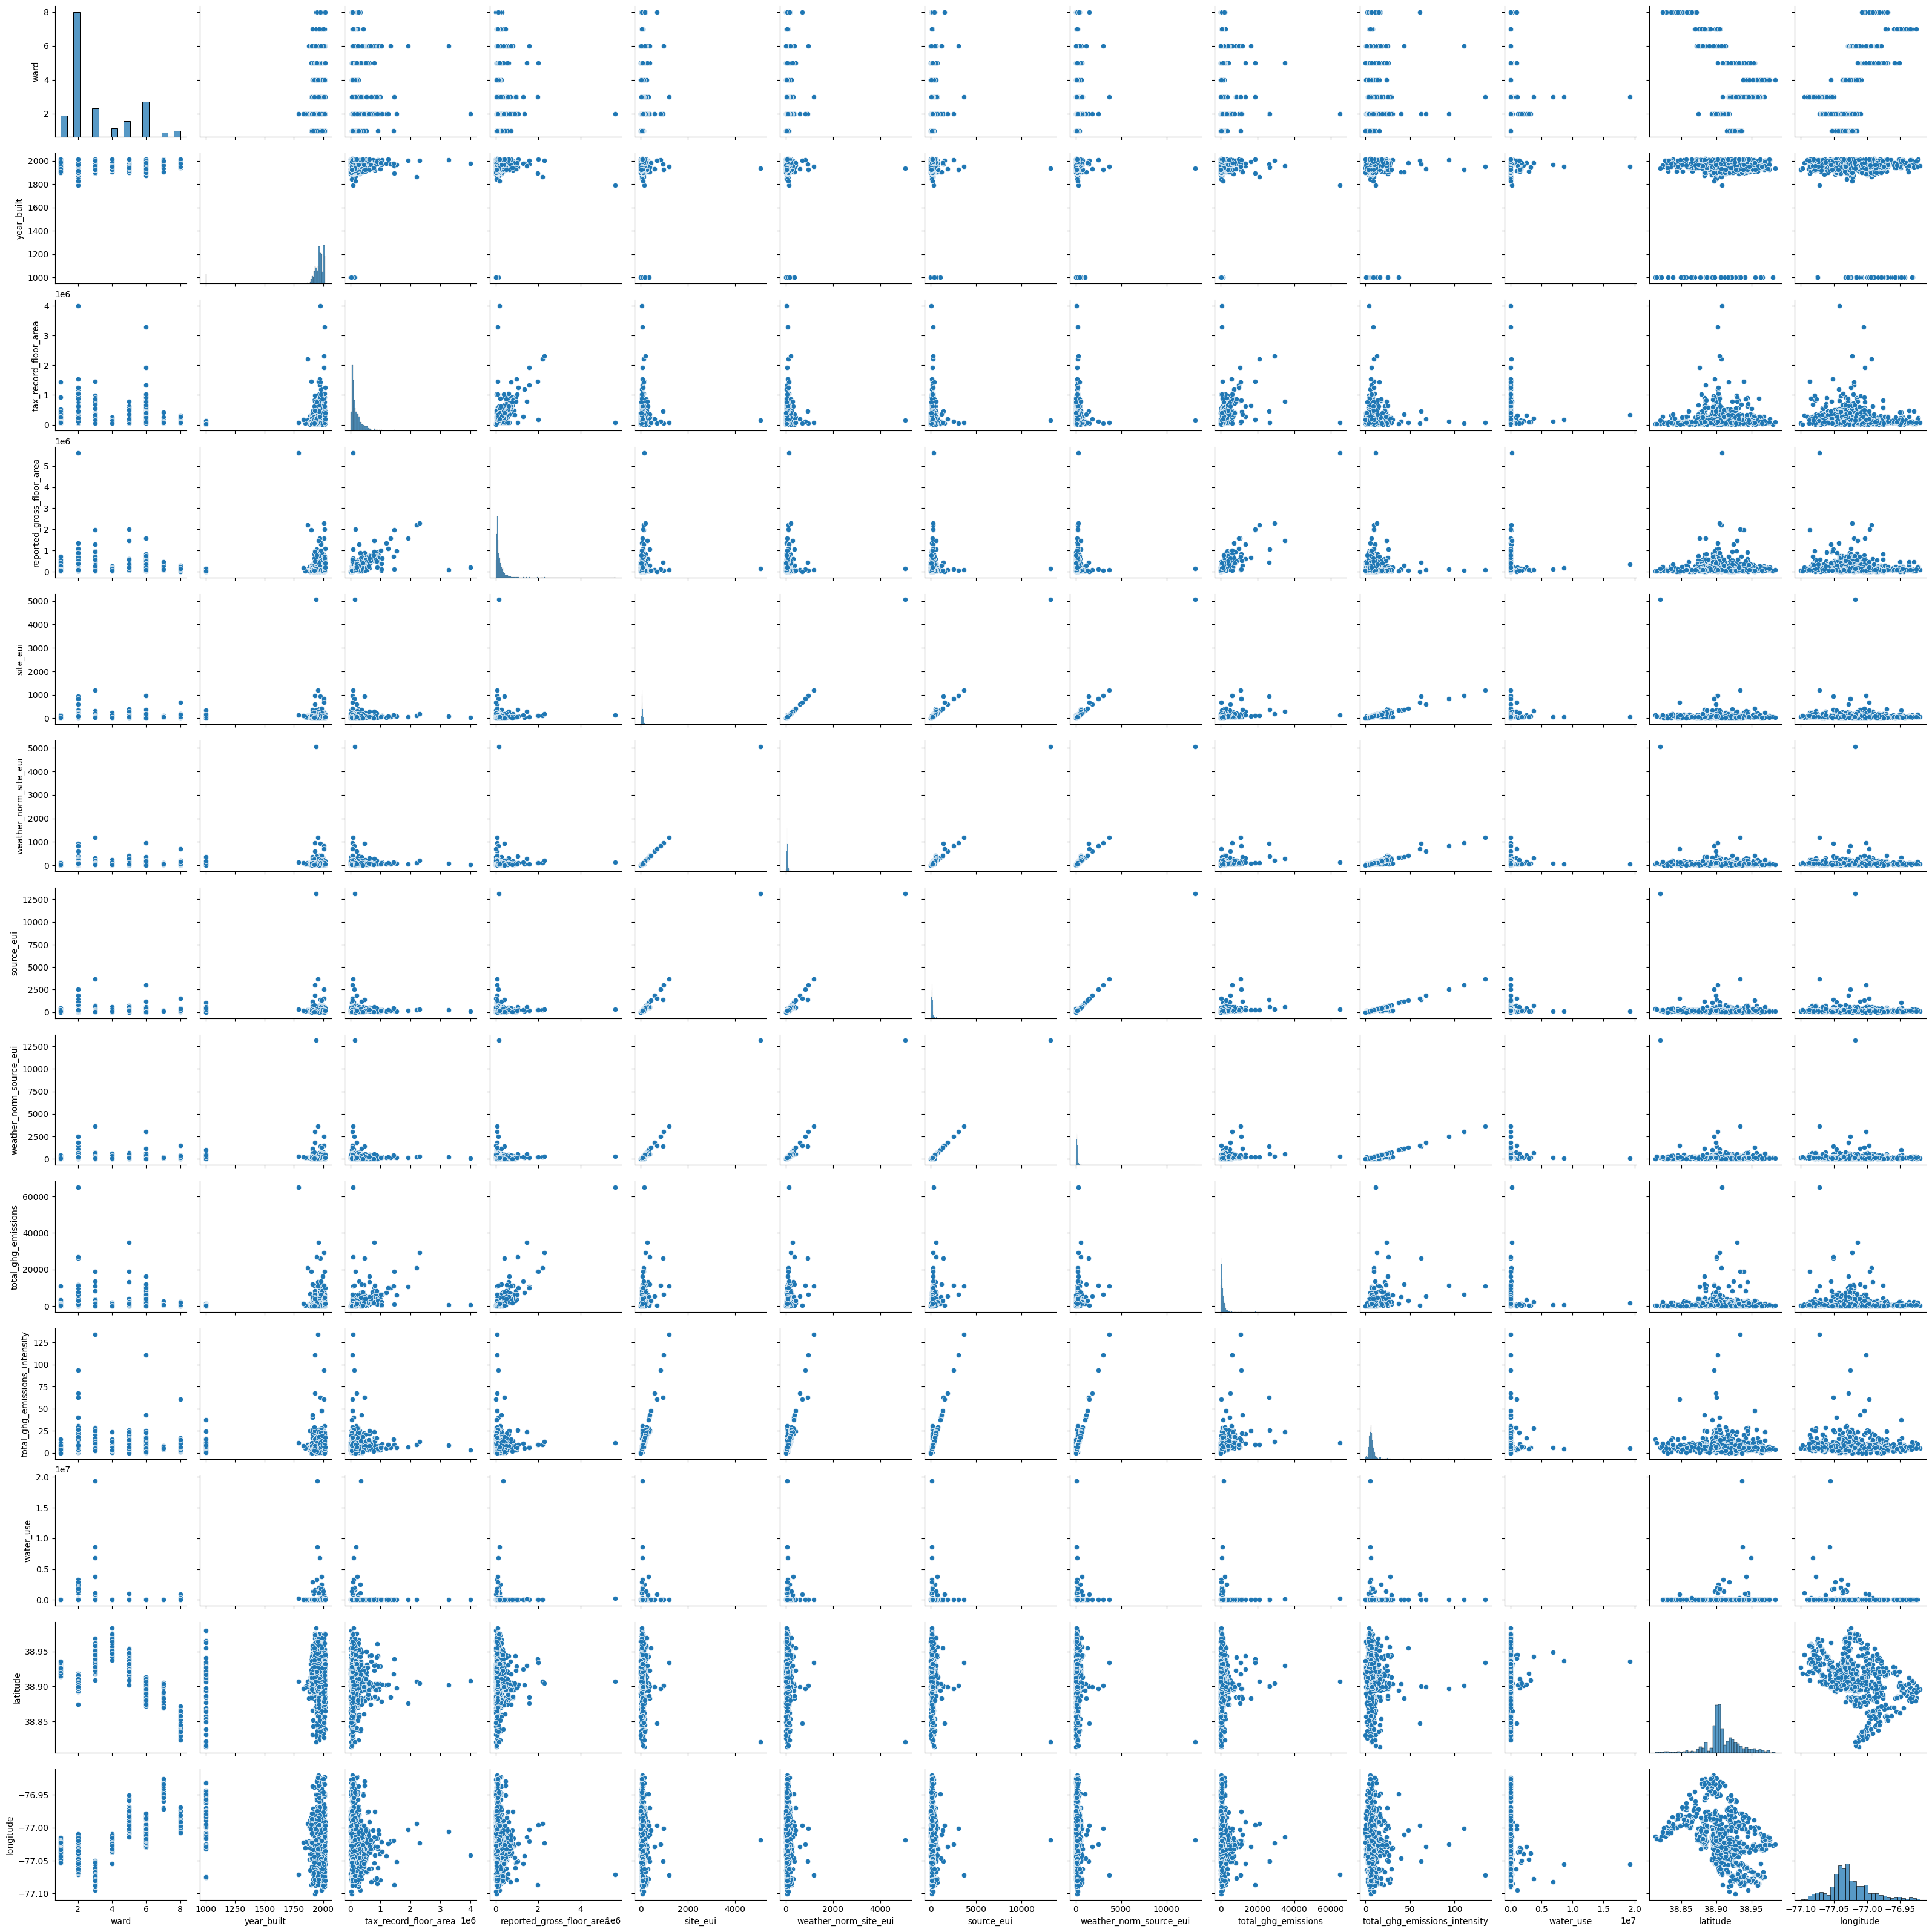

In [21]:
import seaborn as sns
sns.pairplot(X_numeric_data)

<Axes: >

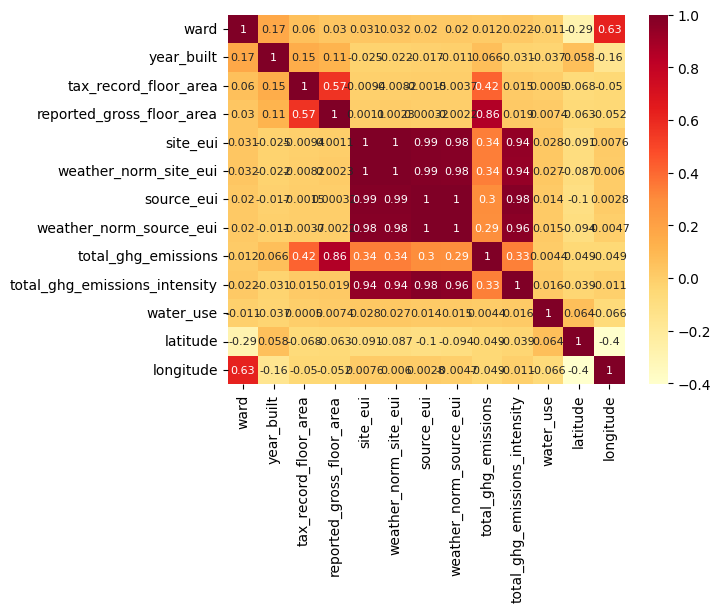

In [22]:
sns.heatmap(X_numeric_data.corr(), annot=True, cmap='YlOrRd', annot_kws={"size": 8})

In [23]:
X_numeric_data = X_numeric_data.drop(['reported_gross_floor_area', 'site_eui', 'weather_norm_site_eui', 'weather_norm_source_eui', 'total_ghg_emissions_intensity'], axis = 1) # delete because we can linear combinations

In [24]:
X_numeric_data.describe()

,ward,year_built,tax_record_floor_area,source_eui,total_ghg_emissions,water_use,latitude,longitude
count,1150.000000,1479.000000,1.482000e+03,1482.000000,1480.000000,1.274000e+03,1422.000000,1422.000000
mean,3.094783,1939.434077,2.036322e+05,199.152834,1433.878041,5.729937e+04,38.908078,-77.027112
std,1.820650,169.455626,2.439483e+05,382.273563,2818.179169,6.591667e+05,0.024295,0.029947
min,1.000000,1000.000000,9.171000e+03,0.000000,0.000000,0.000000e+00,38.813539,-77.100527
25%,2.000000,1945.000000,7.079650e+04,123.200000,411.000000,2.174725e+03,38.898714,-77.044265
50%,2.000000,1970.000000,1.274000e+05,165.250000,803.100000,4.204350e+03,38.904505,-77.031752
75%,4.000000,1992.000000,2.584192e+05,210.750000,1626.800000,7.293950e+03,38.920823,-77.012500
max,8.000000,2017.000000,3.997572e+06,13144.700000,64992.500000,1.929391e+07,38.983573,-76.919927


In [25]:
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (1482, 8) in the numerical variables


## make log transofrmation according to paper

In [26]:
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 665 missing or infinity values in the numerical data


In [27]:
X_numeric_data['tax_record_floor_area'] = np.log10(X_numeric_data['tax_record_floor_area'])
X_numeric_data['water_use'] = np.log10(X_numeric_data['water_use'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 4


## replace inf to nan

In [29]:
X_numeric_data.replace(-np.inf, np.nan, inplace=True)
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


In [30]:
print("the numerical data contains (rows, columns) = ", X_numeric_data.shape)
print("there are {} missing values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

the numerical data contains (rows, columns) =  (1482, 8)
there are 669 missing values in the numerical data


## use Nearest Neighbout Imputer to impute missing values

In [31]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2)

X_numeric_data_imputed = imputer.fit_transform(X_numeric_data)

X_numeric_data_imputed = pd.DataFrame(X_numeric_data_imputed, columns=X_numeric_data.columns)

## Impute missing categorial variables

In [32]:
X_categorical_data.columns

Index(['report_status', 'postal_code', 'metered_areas_energy'], dtype='object')

In [33]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_categorical_data = imputer.fit_transform(X_categorical_data)

X_categorical_data

array([['In Compliance', '20011', 'Whole Building'],
       ['In Compliance', '20005', 'Whole Building'],
       ['In Compliance', '20036', 'Whole Building'],
       ...,
       ['In Compliance', '20017', 'Whole Building'],
       ['In Compliance', '20017', 'Whole Building'],
       ['In Compliance', '20017', 'Whole Building']], dtype=object)

## One Hot Encode the Categorical Variables

In [34]:
wdc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 0 to 2164
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   report_status                  1482 non-null   object 
 1   ward                           1150 non-null   float64
 2   postal_code                    1482 non-null   object 
 3   year_built                     1479 non-null   float64
 4   tax_record_floor_area          1482 non-null   float64
 5   reported_gross_floor_area      1482 non-null   float64
 6   site_eui                       1482 non-null   float64
 7   weather_norm_site_eui          1482 non-null   float64
 8   source_eui                     1482 non-null   float64
 9   weather_norm_source_eui        1482 non-null   float64
 10  total_ghg_emissions            1480 non-null   float64
 11  total_ghg_emissions_intensity  1480 non-null   float64
 12  water_use                      1274 non-null   float6

In [35]:
X_categorical_data = pd.DataFrame(X_categorical_data, columns = ['report_status',
                                                                 'postal_code',
                                                                 'metered_areas_energy'])

In [36]:
X_categorical_data.describe()

,report_status,postal_code,metered_areas_energy
count,1482,1482,1482
unique,2,52,3
top,In Compliance,20005,Whole Building
freq,1416,142,1472


In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

X_c = encoder.fit_transform(X_categorical_data)

column_names = encoder.get_feature_names_out(input_features=X_categorical_data.columns)

X_c_df = pd.DataFrame(X_c, columns=column_names)

In [38]:
feature_name_cat = encoder.get_feature_names_out(input_features=X_categorical_data.columns)

## recombine numerical and categorical input features and split data into training and testing

In [39]:
X_numeric_data_imputed.shape

(1482, 8)

In [40]:
X_c_df.shape

(1482, 57)

In [41]:
X = pd.concat([X_numeric_data_imputed, X_c_df], axis=1)

In [42]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 65 features (!!!)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## run a random forest Regression

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rf = RandomForestRegressor(max_depth=5, min_samples_split=4, min_samples_leaf=2)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4)

In [46]:
print ("the model train accuracy is {:.2}".format(rf.score(X_train, y_train)))

the model train accuracy is 0.86


In [47]:
print ("the model train accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model train accuracy is 0.32


### We can see poor performance on test data because we have a large number of columns while, we are training our model and we had a lot of nan values, so model generalize well on train data and have poor prediction score on test data, here we can see a large overfitting

<ipython-input-48-1600e2418cd0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


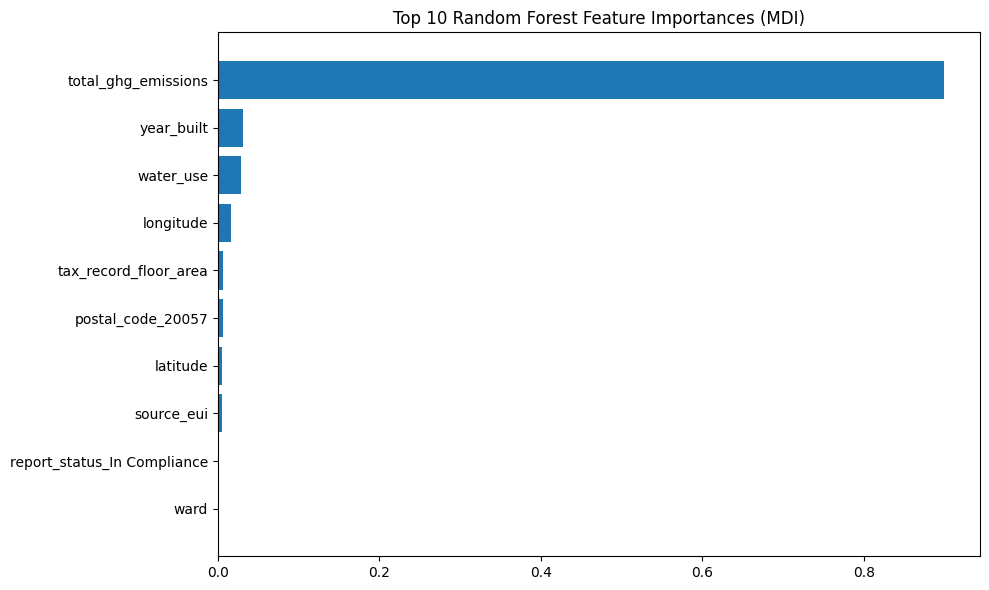

In [48]:
import pylab as plt

tree_feature_importances = rf.feature_importances_

feature_names = X.columns

sorted_idx = np.argsort(tree_feature_importances)[-10:]


y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(-1, len(sorted_idx))

plt.show()

# Task 3.2

## choose a city and read in the data

In [49]:
london = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/refs/heads/master/London/london_2010.csv")

## inspect the dataframe

In [50]:
london.head()

,RRN,RELATED_RRN,ISSUE_DATE,ORGANISATION_NAME,ADDR1,ADDR2,ADDR3,ADDR4,POST_TOWN,COUNTY_OSGB,...,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
0,0793-0110-4549-4309-1096,NaN,11/3/10,Hackney Community College,C BLOCK,Hackney Community College,Falkirk Street,NaN,LONDON,Greater London Authority,...,113,106,237,80,0.0,0.0,140233.0,131546.0,294117.0,99280.0
1,9090-1984-0130-1780-7004,NaN,11/3/10,Mandeville School,NaN,Mandeville School,Horsenden Lane North,NaN,GREENFORD,Greater London Authority,...,178,75,225,56,0.0,0.0,447136.0,188400.0,565200.0,140672.0
2,9770-1059-0907-0690-7901,NaN,11/3/10,St. Mary's RC Junior School,NaN,St. Mary's RC Junior School,Sydenham Road,NaN,CROYDON,Greater London Authority,...,195,47,251,62,0.0,0.0,303225.0,73085.0,390305.0,96410.0
3,0770-0210-5879-1709-4096,NaN,11/3/10,St. Marys Catholic Infant School,NaN,St. Marys Catholic Infant School,Bedford Park,NaN,CROYDON,Greater London Authority,...,225,53,148,40,0.0,0.0,293130.0,69048.4,192814.4,52112.0
4,0210-9908-0180-7890-3050,0210-9908-0280-7490-3054,11/2/10,Haringey NHS Trust,NaN,Haringey NHS Trust,"Hornsey Central Surgery, 151 Park Road",NaN,LONDON,Greater London Authority,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
print("there are (rows, columns) = ", (london.shape), "in the dataframe")

there are (rows, columns) =  (25118, 27) in the dataframe


In [52]:
london.describe()

,ENERGY_RATING,TOTAL_CO2_EMISSIONS,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
count,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04
mean,588.320686,310.257425,3446.070203,175.495063,76.488773,211.222987,64.349670,0.160829,0.450533,6.477280e+05,3.334076e+05,8.072678e+05,2.509368e+05
std,2139.641155,981.165985,6387.539206,171.690924,94.903068,146.326878,39.422694,2.513329,4.528242,2.214199e+06,1.193193e+06,2.387881e+06,6.093786e+05
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,78.000000,74.000000,1321.000000,103.000000,40.000000,148.000000,40.000000,0.000000,0.000000,1.692675e+05,6.242950e+04,2.118782e+05,6.064000e+04
50%,97.000000,123.000000,1911.000000,144.000000,57.000000,164.000000,49.000000,0.000000,0.000000,2.892045e+05,1.106645e+05,3.515070e+05,1.064392e+05
75%,122.000000,260.000000,3391.830000,203.000000,92.000000,235.000000,83.000000,0.000000,0.000000,5.775908e+05,2.681820e+05,7.276708e+05,2.403750e+05
max,9999.000000,46222.000000,280912.000000,8542.000000,10559.000000,1487.000000,344.000000,90.300000,100.000000,1.409695e+08,8.177946e+07,1.123648e+08,2.556299e+07


## Clean the data

In [53]:
for l in london.columns:

  # count number of rows with missing values
  n_miss = london[l].isnull().sum()
  perc = n_miss / london.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (l, london[l].dtype,
                                                  n_miss, perc))

RRN (object):  Missing: 0 (0.0%)
RELATED_RRN (object):  Missing: 17276 (68.8%)
ISSUE_DATE (object):  Missing: 0 (0.0%)
ORGANISATION_NAME (object):  Missing: 5042 (20.1%)
ADDR1 (object):  Missing: 17974 (71.6%)
ADDR2 (object):  Missing: 11 (0.0%)
ADDR3 (object):  Missing: 399 (1.6%)
ADDR4 (object):  Missing: 18290 (72.8%)
POST_TOWN (object):  Missing: 0 (0.0%)
COUNTY_OSGB (object):  Missing: 33 (0.1%)
POSTCODE (object):  Missing: 0 (0.0%)
ENERGY_RATING_BAND (object):  Missing: 0 (0.0%)
ENERGY_RATING (int64):  Missing: 0 (0.0%)
TOTAL_CO2_EMISSIONS (int64):  Missing: 0 (0.0%)
MAIN_HEATING_FUEL (object):  Missing: 4 (0.0%)
BUILDING_ENVIRONMENT (object):  Missing: 0 (0.0%)
FLOOR_AREA (float64):  Missing: 0 (0.0%)
ANNUALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
ANNUALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
RENEWABLESTHERMAL (float64):  Missing: 0 (0.0%)
RENEWABLESELEC

In [54]:
for l in london.columns:

  # count number of rows with missing values
  n_miss = london[l].isnull().sum()
  perc = n_miss / london.shape[0] * 100
  if perc > 40:
    london.drop(l, axis=1, inplace=True)


print("there are (rows, columns) = ", (london.shape), "in the dataframe")

there are (rows, columns) =  (25118, 24) in the dataframe


## transform input feature as needed

In [55]:
london.describe()

,ENERGY_RATING,TOTAL_CO2_EMISSIONS,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
count,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04
mean,588.320686,310.257425,3446.070203,175.495063,76.488773,211.222987,64.349670,0.160829,0.450533,6.477280e+05,3.334076e+05,8.072678e+05,2.509368e+05
std,2139.641155,981.165985,6387.539206,171.690924,94.903068,146.326878,39.422694,2.513329,4.528242,2.214199e+06,1.193193e+06,2.387881e+06,6.093786e+05
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,78.000000,74.000000,1321.000000,103.000000,40.000000,148.000000,40.000000,0.000000,0.000000,1.692675e+05,6.242950e+04,2.118782e+05,6.064000e+04
50%,97.000000,123.000000,1911.000000,144.000000,57.000000,164.000000,49.000000,0.000000,0.000000,2.892045e+05,1.106645e+05,3.515070e+05,1.064392e+05
75%,122.000000,260.000000,3391.830000,203.000000,92.000000,235.000000,83.000000,0.000000,0.000000,5.775908e+05,2.681820e+05,7.276708e+05,2.403750e+05
max,9999.000000,46222.000000,280912.000000,8542.000000,10559.000000,1487.000000,344.000000,90.300000,100.000000,1.409695e+08,8.177946e+07,1.123648e+08,2.556299e+07


In [56]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25118 entries, 0 to 25117
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RRN                          25118 non-null  object 
 1   ISSUE_DATE                   25118 non-null  object 
 2   ORGANISATION_NAME            20076 non-null  object 
 3   ADDR2                        25107 non-null  object 
 4   ADDR3                        24719 non-null  object 
 5   POST_TOWN                    25118 non-null  object 
 6   COUNTY_OSGB                  25085 non-null  object 
 7   POSTCODE                     25118 non-null  object 
 8   ENERGY_RATING_BAND           25118 non-null  object 
 9   ENERGY_RATING                25118 non-null  int64  
 10  TOTAL_CO2_EMISSIONS          25118 non-null  int64  
 11  MAIN_HEATING_FUEL            25114 non-null  object 
 12  BUILDING_ENVIRONMENT         25118 non-null  object 
 13  FLOOR_AREA      

In [57]:
london.drop(columns=['RRN',	'ISSUE_DATE',	'TYPICAL_ANNUAL_ELEC_TOTAL','ORGANISATION_NAME',	'ADDR2',	'ADDR3',	'POST_TOWN',	'COUNTY_OSGB',	'POSTCODE','RENEWABLESTHERMAL', 'RENEWABLESELECTRICAL', 'TYPICALENERGYUSEFUELTHERMAL',
                     'TYPICALENERGYUSEELECTRICAL', 'TYPICAL_ANNUAL_HEAT_TOTAL', 'TOTAL_CO2_EMISSIONS'], inplace=True, axis=1) ## unique columns and not relevant columns to our target variable

## Throw away data where the target variable is missing

In [58]:
london['ACTUAL_ANNUAL_ELEC_TOTAL'].isna().sum()

0

In [59]:
y = london['ACTUAL_ANNUAL_ELEC_TOTAL'].values

In [60]:
X = london.drop('ACTUAL_ANNUAL_ELEC_TOTAL', axis=1)

## separate categorical and numerical values

In [61]:
X_numeric_data = X.select_dtypes(include=[np.number])
X_categorical_data = X.select_dtypes(exclude=[np.number])

In [62]:
X_numeric_data.shape

(25118, 5)

In [63]:
X_categorical_data.shape

(25118, 3)

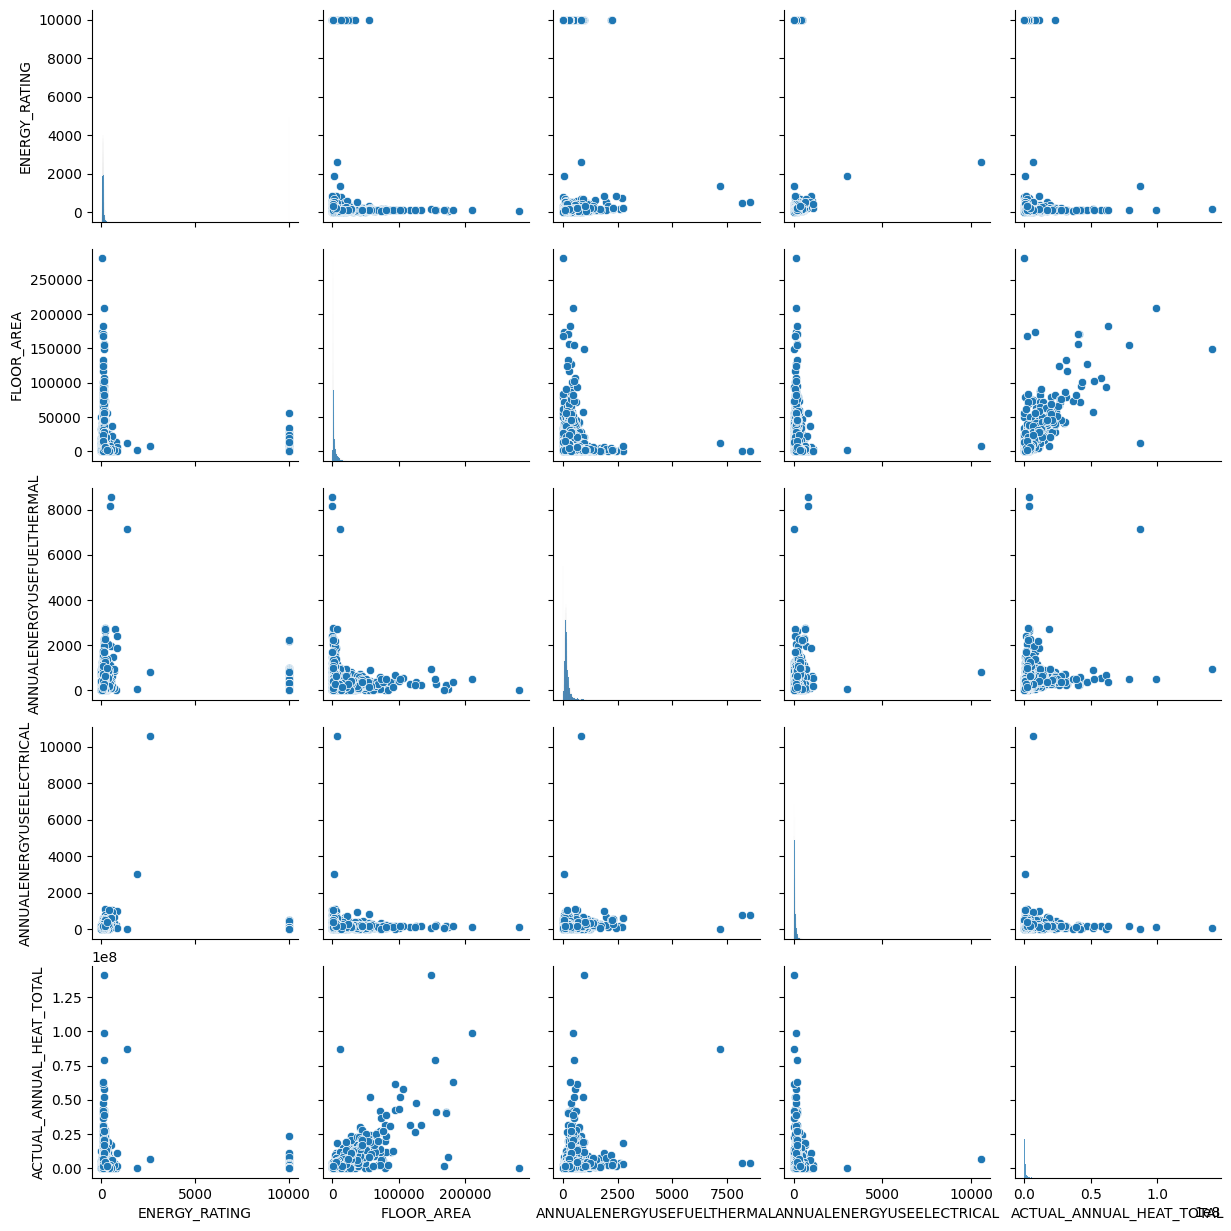

In [64]:
import seaborn as sns
sns.pairplot(X_numeric_data)

<Axes: >

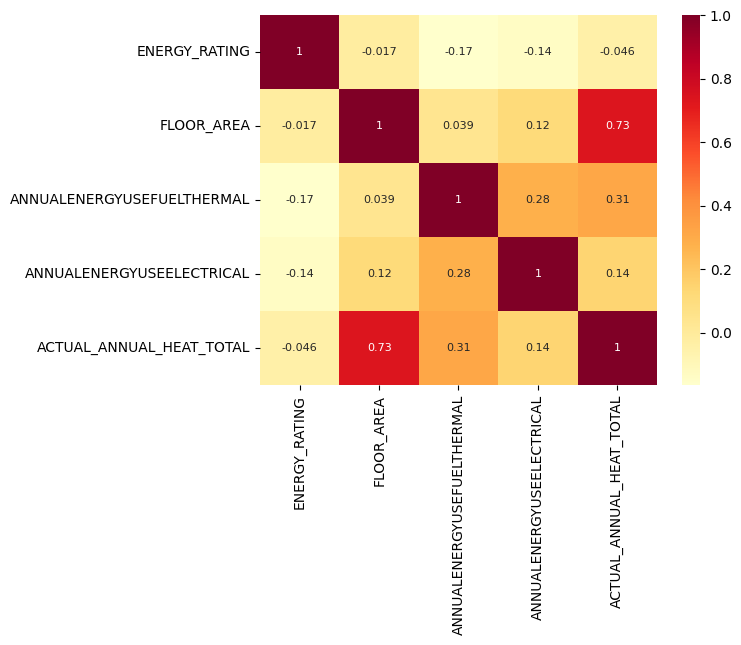

In [65]:
sns.heatmap(X_numeric_data.corr(), annot=True, cmap='YlOrRd', annot_kws={"size": 8})

In [66]:
X_numeric_data = X_numeric_data.drop(['ACTUAL_ANNUAL_HEAT_TOTAL'], axis = 1) # delete because we can linear combinations

In [67]:
X_numeric_data.describe()

,ENERGY_RATING,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL
count,25118.000000,25118.000000,25118.000000,25118.000000
mean,588.320686,3446.070203,175.495063,76.488773
std,2139.641155,6387.539206,171.690924,94.903068
min,-1.000000,1.000000,0.000000,0.000000
25%,78.000000,1321.000000,103.000000,40.000000
50%,97.000000,1911.000000,144.000000,57.000000
75%,122.000000,3391.830000,203.000000,92.000000
max,9999.000000,280912.000000,8542.000000,10559.000000


In [68]:
print("there are (rows, columns) = ", X_numeric_data.shape, "in the numerical variables")

there are (rows, columns) =  (25118, 4) in the numerical variables


## make log transofrmation according to paper

In [69]:
print("there are {} missing or infinity values in the numerical data".format(X_numeric_data.isnull().sum().sum()))

there are 0 missing or infinity values in the numerical data


In [70]:
X_numeric_data['FLOOR_AREA']= np.log10(X_numeric_data['FLOOR_AREA'])

In [71]:
print("number of infinite values:", (np.isinf(X_numeric_data)).sum().sum())

number of infinite values: 0


## Impute missing categorial variables

In [72]:
X_categorical_data.columns

Index(['ENERGY_RATING_BAND', 'MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT'], dtype='object')

In [73]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

X_categorical_data = imputer.fit_transform(X_categorical_data)

X_categorical_data

array([['D', 'Natural Gas', 'Heating and Mechanical Ventilation'],
       ['E', 'Natural Gas', 'Heating and Natural Ventilation'],
       ['D', 'Natural Gas', 'Heating and Natural Ventilation'],
       ...,
       ['D', 'Natural Gas', 'Mixed-mode with Natural Ventilation'],
       ['G', 'Natural Gas', 'Heating and Mechanical Ventilation'],
       ['G', 'Natural Gas', 'Air Conditioning']], dtype=object)

## One Hot Encode the Categorical Variables

In [74]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25118 entries, 0 to 25117
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ENERGY_RATING_BAND          25118 non-null  object 
 1   ENERGY_RATING               25118 non-null  int64  
 2   MAIN_HEATING_FUEL           25114 non-null  object 
 3   BUILDING_ENVIRONMENT        25118 non-null  object 
 4   FLOOR_AREA                  25118 non-null  float64
 5   ANNUALENERGYUSEFUELTHERMAL  25118 non-null  int64  
 6   ANNUALENERGYUSEELECTRICAL   25118 non-null  int64  
 7   ACTUAL_ANNUAL_HEAT_TOTAL    25118 non-null  float64
 8   ACTUAL_ANNUAL_ELEC_TOTAL    25118 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.7+ MB


In [75]:
X_categorical_data = pd.DataFrame(X_categorical_data, columns = ['ENERGY_RATING_BAND',
                                                                 'MAIN_HEATING_FUEL',
                                                                 'BUILDING_ENVIRONMENT'])

In [76]:
X_categorical_data.describe()

,ENERGY_RATING_BAND,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT
count,25118,25118,25118
unique,8,10,7
top,D,Natural Gas,Heating and Natural Ventilation
freq,8221,22137,18718


In [77]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

X_c = encoder.fit_transform(X_categorical_data)

column_names = encoder.get_feature_names_out(input_features=X_categorical_data.columns)

X_c_df = pd.DataFrame(X_c, columns=column_names)

In [78]:
feature_name_cat = encoder.get_feature_names_out(input_features=X_categorical_data.columns)

## recombine numerical and categorical input features and split data into training and testing

In [79]:
X_numeric_data.shape

(25118, 4)

In [80]:
X_c_df.shape

(25118, 25)

In [81]:
X = pd.concat([X_numeric_data, X_c_df], axis=1)

In [82]:
print("The dataset has {} features (!!!)".format(X.shape[1]))

The dataset has 29 features (!!!)


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## run a random forest Regression

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor(max_depth = 8, min_samples_split=6, min_samples_leaf=3)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=6)

In [86]:
print ("the model train accuracy is {:.2}".format(rf.score(X_train, y_train)))

the model train accuracy is 0.96


In [87]:
print ("the model train accuracy is {:.2}".format(rf.score(X_test, y_test)))

the model train accuracy is 0.54


### The R2 score is 0.54, indicating that your model explains about 54% of the variability in energy consumption within the London dataset. I might say that it is not bad performance.

<ipython-input-88-1600e2418cd0>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_names[sorted_idx])


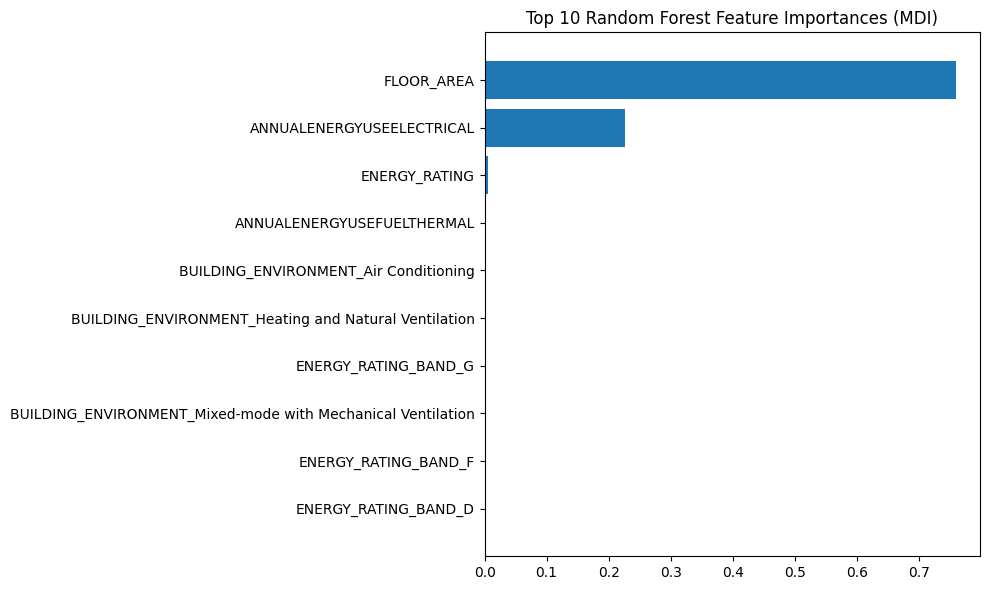

In [88]:
import pylab as plt

tree_feature_importances = rf.feature_importances_

feature_names = X.columns

sorted_idx = np.argsort(tree_feature_importances)[-10:]


y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Random Forest Feature Importances (MDI)")
fig.tight_layout()
ax.set_ylim(-1, len(sorted_idx))

plt.show()

## So accrording to feature importance in Washington D.C and London we see that they are not the same in Washington D.C and London so important feature in Washignton D.C is total_gas_emission, year_built and water_use and London is floor_area and annualenergyuseelectrical

## In paper result we see that water use is important feature in Washington D.C in our analysis this feature is also important

# Task 4

## In comparison after exploratory data analysis, feature engineering and building and evaluating predictive model, we can say the next:

1.   Both of that models are overfitted.
2.   In case of frist model for Washington D.C we can see a poor prediction of  r2_score on test data it may be because we don't have enough samples in test data and we have too much features on which we train the model.
3.   In case of second model for London we can see a normal prediction of r2_score on test data.
4.   To improve perforamnce for both of that model we can do the next: we need to work with data more carefully, make more visualizations and provide different statistical tests to understand which features is going to be the best for our model, also we can try different machine learning algrotihms to compare performance and compare results for the each model.






